# Part II - Lending Patterns and Borrower Risk (using Prosper Loan Data)
## by Pratiti Soumya

## Investigation Overview

This presentation aims to explore how different borrower characteristics—like employment status, income range, and credit score—affect loan behavior and interest rates on the Prosper peer-to-peer lending platform. 

My goal is to visually communicate three core insights:
- How loan interest rates vary across different employment and income groups
- How loan amount patterns change by borrower income and employment status
- How credit scores relate to assigned interest rates and income

By focusing on these visual narratives, I hope to better communicate how Prosper appears to evaluate borrower risk and how that impacts their lending decisions.


## Dataset Overview and Executive Summary

For this presentation, I used a cleaned version of the Prosper loan dataset. In Part I, I dropped columns that weren’t useful, handled missing values, and converted time-related fields into the right datetime format. I saved the final dataset as `Prosperloandata_clean.csv`.

The dataset has information on over 111,000 loans, including details about borrower income, credit scores, employment, interest rates, and loan status.

Here’s a quick summary of the key things I found and will explain using visuals:
- People with lower income or uncertain jobs (like part-time or self-employed) usually got higher interest rates.
- Borrowers with higher income asked for and received bigger loans.
- Borrower interest rates were clearly lower for people with better credit scores.
- Employment status seemed to affect both the loan amounts and the interest rates people received.

I’ll show each of these patterns step-by-step in the next sections using simple charts.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperdata_final.csv')
df.head()

,ListingCreationDate,Term,LoanStatus,BorrowerRate,EstimatedReturn,ProsperRating (Alpha),ProsperScore,EmploymentStatus,CreditScoreRangeLower,CreditScoreRangeUpper,InquiriesLast6Months,DelinquenciesLast7Years,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount
0,2007-08-26 19:09:29.263,36,Completed,0.1580,NaN,NaN,NaN,Self-employed,640.0,659.0,3.0,4.0,0.17,"$25,000-49,999",3083.333333,9425
1,2014-02-27 08:28:07.900,36,Current,0.0920,0.05470,A,7.0,Employed,680.0,699.0,3.0,0.0,0.18,"$50,000-74,999",6125.000000,10000
2,2012-10-22 11:02:35.010,36,Current,0.0974,0.06000,A,9.0,Employed,800.0,819.0,0.0,14.0,0.15,"$25,000-49,999",2875.000000,10000
3,2013-09-14 18:38:39.097,36,Current,0.2085,0.09066,D,4.0,Employed,680.0,699.0,1.0,0.0,0.26,"$100,000+",9583.333333,15000
4,2013-12-14 08:26:37.093,60,Current,0.1314,0.07077,B,10.0,Employed,740.0,759.0,0.0,0.0,0.36,"$100,000+",8333.333333,15000


In [3]:
df.columns

Index(['ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerRate',
       'EstimatedReturn', 'ProsperRating (Alpha)', 'ProsperScore',
       'EmploymentStatus', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'InquiriesLast6Months', 'DelinquenciesLast7Years', 'DebtToIncomeRatio',
       'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount'],
      dtype='object')

## Visualization 1: Interest Rate vs. Credit Score by Employment Status

I wanted to showcase how a borrower's ProsperScore (a measure of creditworthiness) affects the interest rate they get — and whether employment status plays a role in this relationship.

I created a line chart showing the average borrower rate for each ProsperScore, grouped by Employment Status. This allowed me to compare patterns across different employment categories.

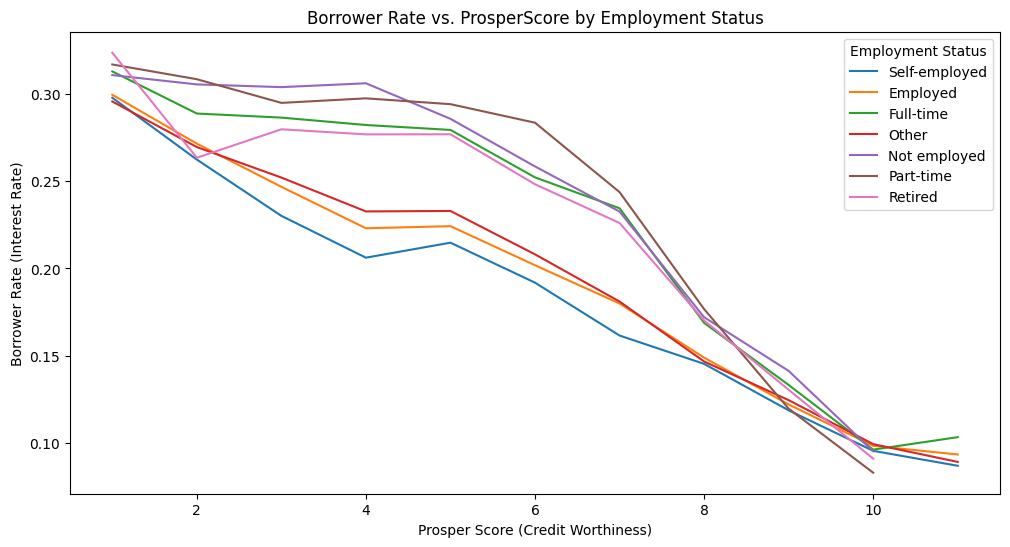

In [4]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='ProsperScore', y='BorrowerRate', hue='EmploymentStatus', ci=None)
plt.title('Borrower Rate vs. ProsperScore by Employment Status')
plt.xlabel('Prosper Score (Credit Worthiness)')
plt.ylabel('Borrower Rate (Interest Rate)')
plt.legend(title='Employment Status', loc='upper right')
plt.show()


### Observation
- As ProsperScore or Credit Score increases, BorrowerRate or Interest Rates generally decrease.

- Borrowers who are not employed, part-time, or retired tend to get higher rates than those employed full-time or self-employed at the same ProsperScore level.

- This reinforces the idea that creditworthiness (score) and employment status both matter to interest rate assignment.

Borrowers with higher credit scores consistently received lower interest rates. Unemployed and part-time workers had higher rates across the board, even when their ProsperScores were the same. This shows that both credit score and employment status influence loan terms.

## Visualization 2: Employment Status vs Interest Rate, by Loan Status


I wanted to showcase how a borrower's employment status affect the interest rate they get — and whether this is a pattern consistent across different loan outcomes

In [5]:
# Filter to key loan statuses for clarity
key_statuses = ['Current', 'Completed', 'Chargedoff', 'Defaulted']
df_subset = df[df['LoanStatus'].isin(key_statuses)]

In [6]:
# Set the EmploymentStatus axis
emp_order = ['Not employed', 'Part-time', 'Self-employed','Retired', 'Employed', 'Full-time', 'Other']

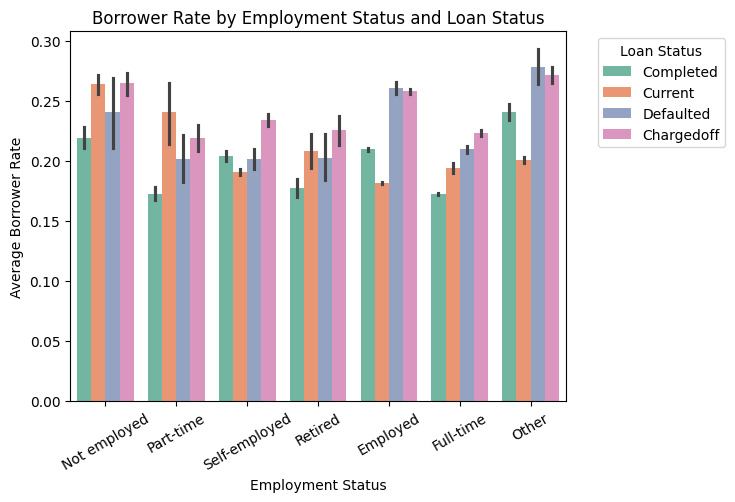

In [7]:
# Clustered bar chart: Borrower Rate vs Employment Status, grouped by Loan Status
sns.barplot( data=df_subset, x='EmploymentStatus', y='BorrowerRate',  hue='LoanStatus', order=emp_order,palette='Set2')

plt.title('Borrower Rate by Employment Status and Loan Status')
plt.xlabel('Employment Status')
plt.ylabel('Average Borrower Rate')
plt.xticks(rotation=30)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left');


### Observation:
- Across each employment group, those with defaulted or charged-off loans have higher average rates than those who completed or are currently repaying.
- Borrowers who are not employed, part-time or self-employed generally recieve higher interest rate than full-time or employed individuals.
- **While employment status clearly influences rates, it's not as strong a predictor as credit score. Still, it's a meaningful secondary factor in lending patterns.**

## Visualization 3 - Correlation Heatmap of Numeric Features

I wanted to showcase how closely income, credit score, and borrower rate are related to each other — to see which factor has the strongest influence on interest rate.

In [8]:
#Choose variables of interest
stats=['BorrowerRate', 'StatedMonthlyIncome','CreditScoreRangeLower']

Text(0.5, 1.0, 'Correlation Heatmap of Borrower Rate, Income, and Credit Score')

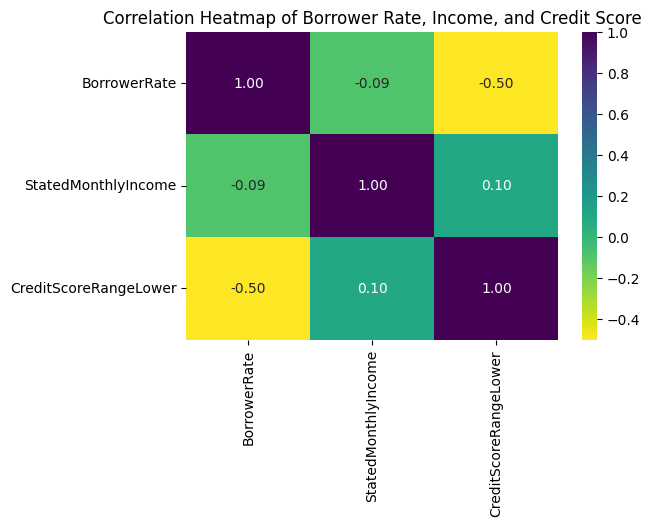

In [9]:
# Compute and plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[stats].corr(), annot=True, cmap='viridis_r', fmt='.2f')
plt.title('Correlation Heatmap of Borrower Rate, Income, and Credit Score')

- BorrowerRate shows a strong negative correlation with CreditScoreRangeLower (-0.50), meaning borrowers with lower credit scores are assigned higher interest rates.

- The relationship between Borrower Rate and Income is very weak (-0.09), indicating that income may not be a strong standalone predictor of interest rate.

- Credit Score and Income have a very weak positive correlation (0.10), showing only a minimal association.

**Overall, the strongest insight here is the inverse relationship between credit score and borrower rate, which supports earlier trends. Income is not a significant factor in predicting interest rates a borrower will receive.**

### Conclusion:

Through this analysis, I was able to better understand and recommend what factors influence the interest rates assigned to Prosper loan borrowers.

Here’s what I found:

- Credit score has the strongest impact on the interest rate a borrower receives. The higher the credit score, the lower the borrower rate — this was consistent across all employment types.

- Employment status plays a secondary role. While it doesn’t impact rates as directly as credit score, some differences were visible, especially when combined with credit scores or loan statuses.

- Income range does not show a strong relationship with interest rate. The data suggests that Prosper may not be using income as a primary factor when setting interest rates.

**Together, these three visuals tell me that borrower interest rates are mainly driven by creditworthiness, not earnings, and understanding this can help both borrowers and lenders make more informed decisions.**

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
